# Exploring the simulation results

In [45]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
df_nan = pd.read_hdf('results/run_grid_5_nan.hdf')
df_notnan = pd.read_hdf('results/run_grid_5_notnan.hdf')

# df = pd.read_hdf('results/run_new_parallel.hdf')
# df

df = pd.concat([df_nan, df_notnan])
df

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
0,300,300,2,4,0.0,0.0,0.0,0.000000,0.000000,100,5000,"[125.91604550426393, 125.91604550426393, 125.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
1,300,300,2,4,0.0,0.0,0.0,0.000000,33.333333,100,5000,"[124.13783258535477, 124.13783258535477, 123.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
2,300,300,2,4,0.0,0.0,0.0,0.000000,66.666667,100,5000,"[121.79813810879718, 121.79813810879718, 121.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
3,300,300,2,4,0.0,0.0,0.0,0.000000,100.000000,100,5000,"[124.13728787626353, 124.13728787626353, 124.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
4,300,300,2,4,0.0,0.0,0.0,33.333333,0.000000,100,5000,"[126.07755412741675, 126.07755412741675, 125.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,300,300,2,4,100.0,100.0,100.0,66.666667,100.000000,100,5000,"[125.30838549871402, 125.30838549871402, 125.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",603.0
1020,300,300,2,4,100.0,100.0,100.0,100.000000,0.000000,100,5000,"[127.58677368644662, 127.58677368644662, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",509.0
1021,300,300,2,4,100.0,100.0,100.0,100.000000,33.333333,100,5000,"[126.82875154742676, 126.82875154742676, 126.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",503.0
1022,300,300,2,4,100.0,100.0,100.0,100.000000,66.666667,100,5000,"[121.86259383757792, 121.86259383757792, 121.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",516.0


### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [3]:
def get_success_step(dists, success_dist):
    try:
        return np.where(dists < success_dist)[0][0]
    except IndexError:
        return np.NaN

success_dist = 40

df['success_steps'] = df.apply(lambda row: get_success_step(row['goal_distance'], 40), axis=1)
df.sort_values(by=['success_steps']).head(40)

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
764,300,300,2,4,66.666667,100.000000,100.000000,100.000000,0.000000,100,5000,"[125.82439765623882, 125.82439765623882, 125.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",408.0
700,300,300,2,4,66.666667,66.666667,100.000000,100.000000,0.000000,100,5000,"[129.0596595670383, 129.0596595670383, 128.828...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",413.0
696,300,300,2,4,66.666667,66.666667,100.000000,66.666667,0.000000,100,5000,"[122.26093395790532, 122.26093395790532, 122.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",424.0
956,300,300,2,4,100.000000,66.666667,100.000000,100.000000,0.000000,100,5000,"[123.28252007787283, 123.28252007787283, 123.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",438.0
765,300,300,2,4,66.666667,100.000000,100.000000,100.000000,33.333333,100,5000,"[123.65065701506886, 123.65065701506886, 123.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",438.0
760,300,300,2,4,66.666667,100.000000,100.000000,66.666667,0.000000,100,5000,"[130.92465473907927, 130.92465473907927, 130.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",444.0
636,300,300,2,4,66.666667,33.333333,100.000000,100.000000,0.000000,100,5000,"[123.87592967387911, 123.87592967387911, 123.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",455.0
508,300,300,2,4,33.333333,100.000000,100.000000,100.000000,0.000000,100,5000,"[125.29629051795895, 125.29629051795895, 125.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",458.0
761,300,300,2,4,66.666667,100.000000,100.000000,66.666667,33.333333,100,5000,"[125.44042315353803, 125.44042315353803, 125.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",471.0
701,300,300,2,4,66.666667,66.666667,100.000000,100.000000,33.333333,100,5000,"[130.83984492268456, 130.83984492268456, 130.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",474.0


In [114]:
# df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
# df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')

/tmp/ipykernel_106633/893070050.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
/tmp/ipykernel_106633/893070050.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')


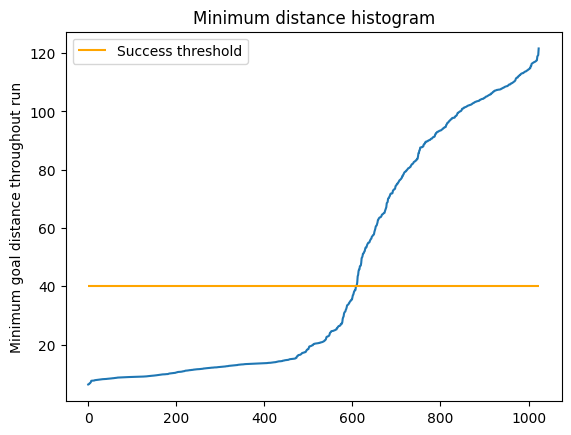

In [4]:
y = df.apply(lambda row: np.min(row['goal_distance']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Minimum distance histogram')
ax.set_ylabel('Minimum goal distance throughout run')
ax.hlines(y=success_dist, xmin=0, xmax=len(y), color='orange', label='Success threshold')
ax.legend()
plt.show()

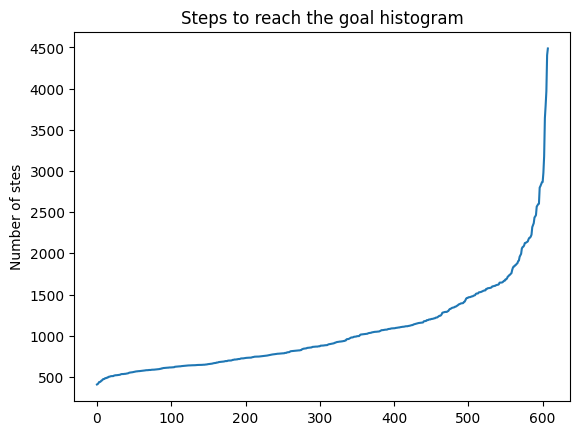

In [5]:
y = df[df['success_steps'].notna()].apply(lambda row: np.min(row['success_steps']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Steps to reach the goal histogram')
ax.set_ylabel('Number of stes')
plt.show()

In [7]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def visualize_run(run, average_steps=500):
    x = list(range(run['max_iter']))

    step_stats = run['goal_distance']
    parent_stats = run['parent_satisfaction']
    infant_stats = run['infant_satisfaction']

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots(figsize=(16, 10))

    ax1.plot(x, step_stats, color='r')
    ax1.set_ylim(bottom=0, top=150)
    ax1.set_ylabel('goal distance')
    ax1.set_xlabel('step')

    title = f' \
    lego={run["lego_count"]},\
    prec={run["precision"]:.2f},\
    exp={run["exploration"]:.2f},\
    coord={run["coordination"]:.2f},\
    resp={run["responsiveness"]:.2f},\
    rel={run["relevance"]:.2f}, \
    avg for {run["repeats"]} runs \
    '
    ax1.set_title(title)

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color='b')
    ax2.set_ylabel('satisfaction')

    ax2.plot(x, infant_stats, color='orange')
    ax2.legend(['parent', 'infant'])
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color='grey', label='axvline - full height')

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

In [189]:
df.sort_values(by=['success_steps']).head()

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
764,300,300,2,4,66.666667,100.000000,100.0,100.000000,0.000000,100,5000,"[125.82439765623882, 125.82439765623882, 125.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",408.0
700,300,300,2,4,66.666667,66.666667,100.0,100.000000,0.000000,100,5000,"[129.0596595670383, 129.0596595670383, 128.828...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",413.0
696,300,300,2,4,66.666667,66.666667,100.0,66.666667,0.000000,100,5000,"[122.26093395790532, 122.26093395790532, 122.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",424.0
956,300,300,2,4,100.000000,66.666667,100.0,100.000000,0.000000,100,5000,"[123.28252007787283, 123.28252007787283, 123.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",438.0
765,300,300,2,4,66.666667,100.000000,100.0,100.000000,33.333333,100,5000,"[123.65065701506886, 123.65065701506886, 123.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",438.0


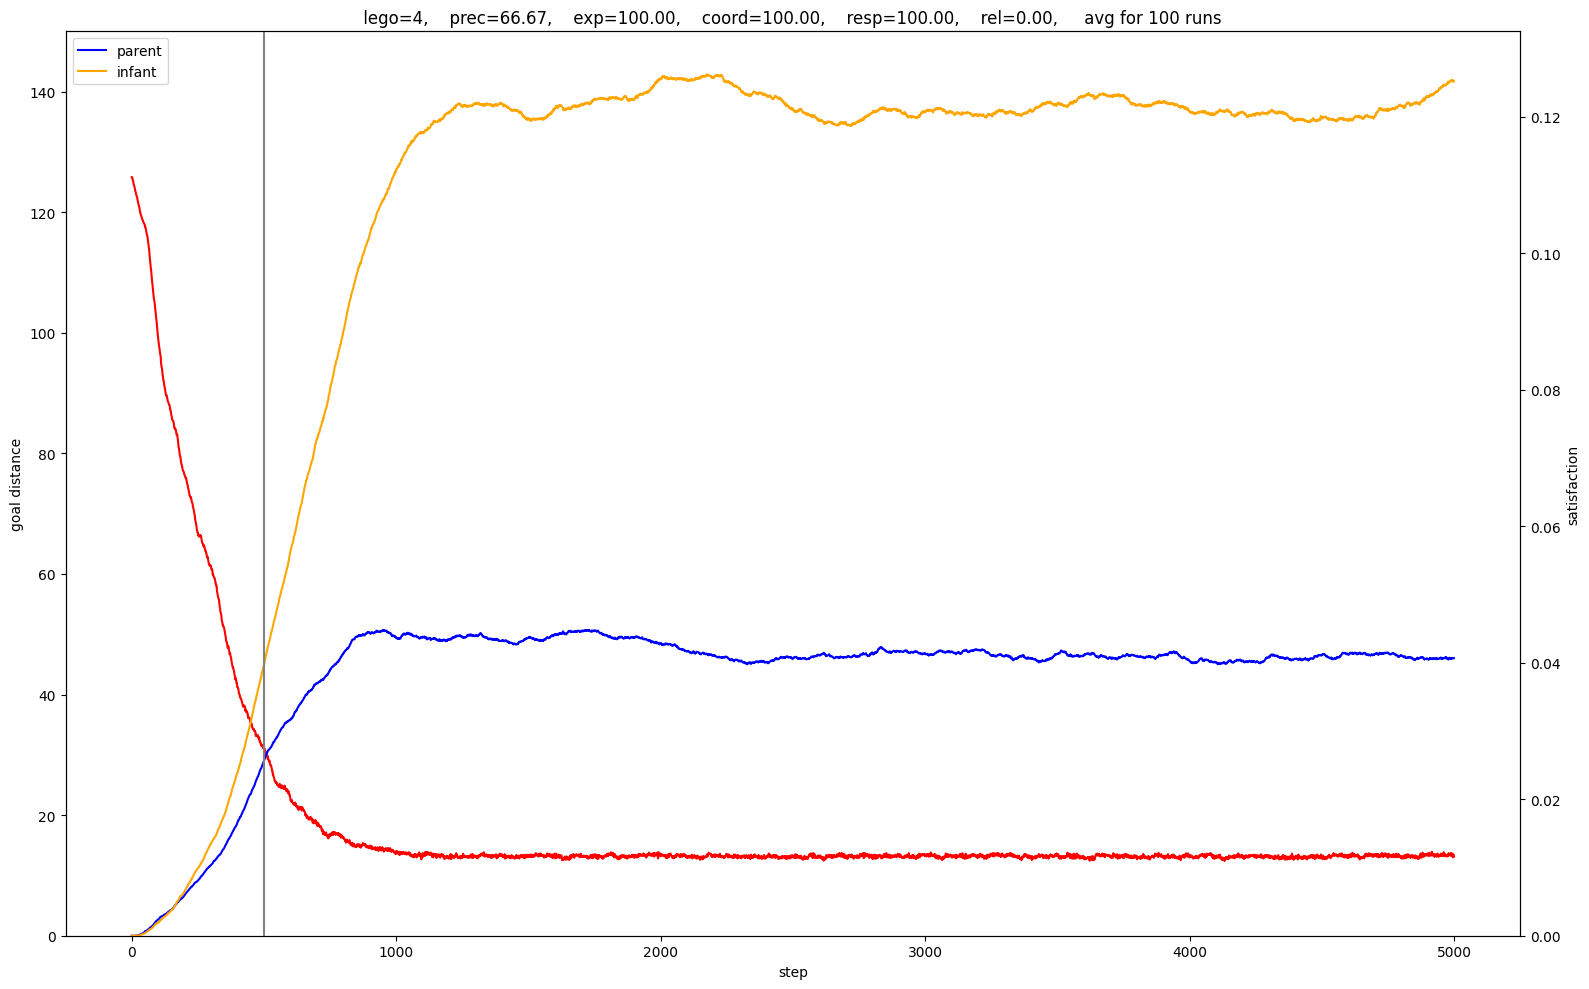

In [8]:
visualize_run(df.loc[764, :], average_steps=500)

## Create heatmap for 2 variables
The other 3 parameters are fixed based on the most common value in the most successful runs

In [17]:
top_runs_no = 20

top_runs = df.sort_values(by=['success_steps']).head(top_runs_no)

best_params = []
for param in ['relevance', 'responsiveness', 'coordination']:
    best_params.append(np.argmax(np.bincount(top_runs[param])))

rel, resp, coord = best_params

selected_runs = df[ (df['relevance'] == rel) & (df['responsiveness'] == resp) & (df['coordination'] == coord)]
selected_runs = selected_runs.sort_values(by=['precision', 'exploration'])
selected_runs

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
60,300,300,2,4,0.000000,0.000000,100.0,100.0,0.0,100,5000,"[124.30411259174726, 124.30411259174726, 124.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
124,300,300,2,4,0.000000,33.333333,100.0,100.0,0.0,100,5000,"[130.4849921735193, 130.4849921735193, 130.318...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
188,300,300,2,4,0.000000,66.666667,100.0,100.0,0.0,100,5000,"[122.9687293201175, 122.9687293201175, 122.749...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
252,300,300,2,4,0.000000,100.000000,100.0,100.0,0.0,100,5000,"[125.81326441034876, 125.81326441034876, 125.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
316,300,300,2,4,33.333333,0.000000,100.0,100.0,0.0,100,5000,"[123.12147950439059, 123.12147950439059, 122.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",687.0
380,300,300,2,4,33.333333,33.333333,100.0,100.0,0.0,100,5000,"[126.4578609516325, 126.4578609516325, 126.274...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",554.0
444,300,300,2,4,33.333333,66.666667,100.0,100.0,0.0,100,5000,"[120.0549669679225, 120.0549669679225, 119.866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",484.0
508,300,300,2,4,33.333333,100.000000,100.0,100.0,0.0,100,5000,"[125.29629051795895, 125.29629051795895, 125.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",458.0
572,300,300,2,4,66.666667,0.000000,100.0,100.0,0.0,100,5000,"[124.60216462405957, 124.60216462405957, 124.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",579.0
636,300,300,2,4,66.666667,33.333333,100.0,100.0,0.0,100,5000,"[123.87592967387911, 123.87592967387911, 123.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",455.0


In [59]:
hm_data = selected_runs['success_steps'].to_numpy().reshape(4, 4)
# hm_data = np.nan_to_num(hm_data, nan=5001)
hm_data

nan

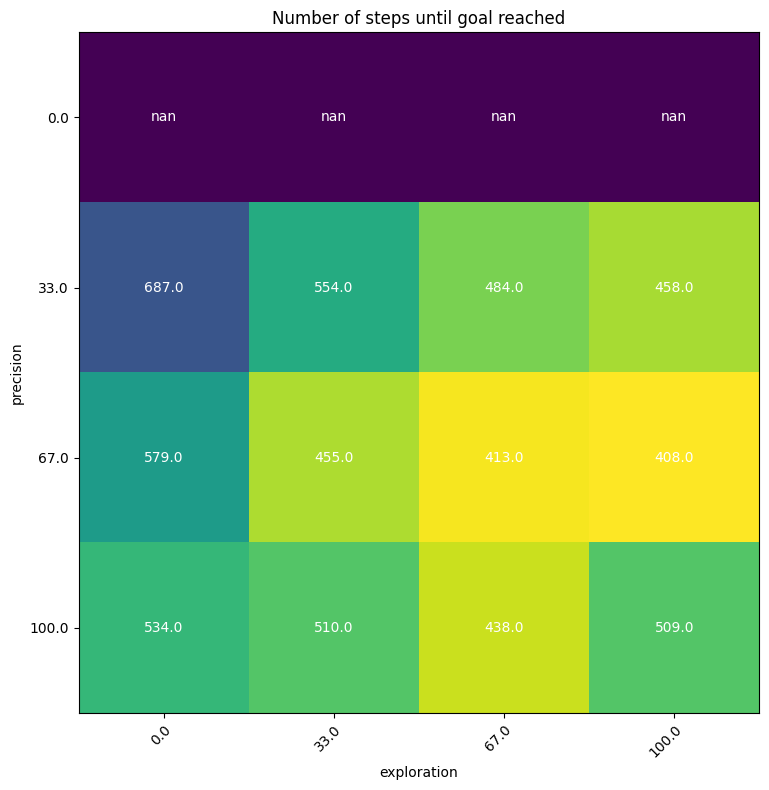

In [68]:
precision = selected_runs['precision'].unique().round()
exploration = selected_runs['exploration'].unique().round()

colormap_data = np.nan_to_num(hm_data, nan=(np.nanmax(hm_data) + 100))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(colormap_data, cmap=matplotlib.colormaps['viridis_r'])

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(exploration)), labels=precision)
ax.set_yticks(np.arange(len(precision)), labels=exploration)

ax.set_xlabel('exploration')
ax.set_ylabel('precision')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(precision)):
    for j in range(len(exploration)):
        text = ax.text(j, i, hm_data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Number of steps until goal reached")
fig.tight_layout()
plt.show()